In [1]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

df = pd.read_csv('data/polished3.csv')

male = df[df["Sex"] == "M"]
female = df[df["Sex"] == "F"]

used_columns = ["Height", "BMI", "Age"]

bio_by_sport_male = male.groupby(['Event'])[used_columns].median().reset_index()
bio_by_sport_female = female.groupby(['Event'])[used_columns].median().reset_index()

In [2]:
from sklearn.preprocessing import StandardScaler

columns_to_normalize = ['Height', 'BMI', 'Age']

scaler = StandardScaler()

means_male = bio_by_sport_male[columns_to_normalize].mean()
stdvs_male = bio_by_sport_male[columns_to_normalize].std()
means_female = bio_by_sport_female[columns_to_normalize].mean()
stdvs_female = bio_by_sport_female[columns_to_normalize].std()

bio_by_sport_male[columns_to_normalize] = scaler.fit_transform(bio_by_sport_male[columns_to_normalize])
bio_by_sport_female[columns_to_normalize] = scaler.fit_transform(bio_by_sport_female[columns_to_normalize])


bio_by_sport_male.head()
bio_by_sport_female.head()

,Event,Height,BMI,Age
0,Archery Women's Individual,-0.053835,0.025796,0.039409
1,Archery Women's Team,-0.053835,0.150653,-0.204212
2,"Athletics Women's 1,500 metres",-0.409250,-1.127344,0.283031
3,Athletics Women's 10 kilometres Walk,-0.764666,-0.930125,0.039409
4,"Athletics Women's 10,000 metres",-0.942374,-1.431384,0.283031


In [3]:
k_values = range(2, 13)
silhouette_scores_male = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(bio_by_sport_male[used_columns])
    score = silhouette_score(bio_by_sport_male[used_columns], clusters)
    silhouette_scores_male.append(score)

silhouette_scores_df = pd.DataFrame({'k': k_values, 'Score': silhouette_scores_male})
silhouette_scores_df.sort_values(by='Score')

,k,Score
0,2,0.261996
8,10,0.268556
9,11,0.275014
7,9,0.275444
6,8,0.289802
10,12,0.292814
4,6,0.295596
5,7,0.322005
3,5,0.324398
1,3,0.389821


In [4]:
k_values = range(2, 13)
silhouette_scores_female = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(bio_by_sport_female[used_columns])
    score = silhouette_score(bio_by_sport_female[used_columns], clusters)
    silhouette_scores_female.append(score)

silhouette_scores_df = pd.DataFrame({'k': k_values, 'Score': silhouette_scores_female})
silhouette_scores_df.sort_values(by='Score')

,k,Score
0,2,0.224888
1,3,0.251608
3,5,0.264018
2,4,0.291521
4,6,0.323010
6,8,0.329947
10,12,0.338634
7,9,0.342415
5,7,0.348482
8,10,0.350799


In [5]:
kmeans = KMeans(n_clusters=2, random_state=42)
bio_by_sport_male['Cluster'] = kmeans.fit_predict(bio_by_sport_male[used_columns])
bio_by_sport_male.sort_values(by='Cluster')

,Event,Height,BMI,Age,Cluster
0,Archery Men's Individual,-0.057436,-0.065440,0.023606,0
2,"Athletics Men's 1,500 metres",-0.057436,-1.176637,-0.557110,0
3,"Athletics Men's 1,600 metres Medley Relay",0.152405,-0.744473,-0.702289,0
4,Athletics Men's 10 kilometres Walk,-0.337224,-0.756889,0.459144,0
6,Athletics Men's 100 metres,-0.057436,-0.365974,-0.557110,0
...,...,...,...,...,...
237,"Wrestling Men's Light-Heavyweight, Greco-Roman",0.292299,1.189968,0.023606,1
240,"Wrestling Men's Middleweight, Freestyle",-0.337224,0.760808,0.023606,1
241,"Wrestling Men's Middleweight, Greco-Roman",-0.197330,0.750144,0.023606,1
243,"Wrestling Men's Super-Heavyweight, Greco-Roman",1.481399,3.729772,0.023606,1


In [6]:
kmeans = KMeans(n_clusters=2, random_state=42)
bio_by_sport_female['Cluster'] = kmeans.fit_predict(bio_by_sport_female[used_columns])
bio_by_sport_female.sort_values(by='Cluster')

,Event,Height,BMI,Age,Cluster
0,Archery Women's Individual,-0.053835,0.025796,0.039409,0
6,Athletics Women's 100 metres Hurdles,0.301580,-0.236459,0.039409,0
27,Athletics Women's Shot Put,1.545534,2.733070,0.039409,0
22,Athletics Women's Javelin Throw,0.834704,1.039813,0.039409,0
20,Athletics Women's Heptathlon,1.190119,-0.300545,0.039409,0
...,...,...,...,...,...
162,Weightlifting Women's Middleweight,-1.475497,1.265716,-0.326023,1
165,"Wrestling Women's Flyweight, Freestyle",-2.097474,-0.688278,0.039409,1
161,Weightlifting Women's Lightweight,-1.830912,0.685062,-0.326023,1
164,"Wrestling Women's Featherweight, Freestyle",-0.942374,-0.490964,0.039409,1


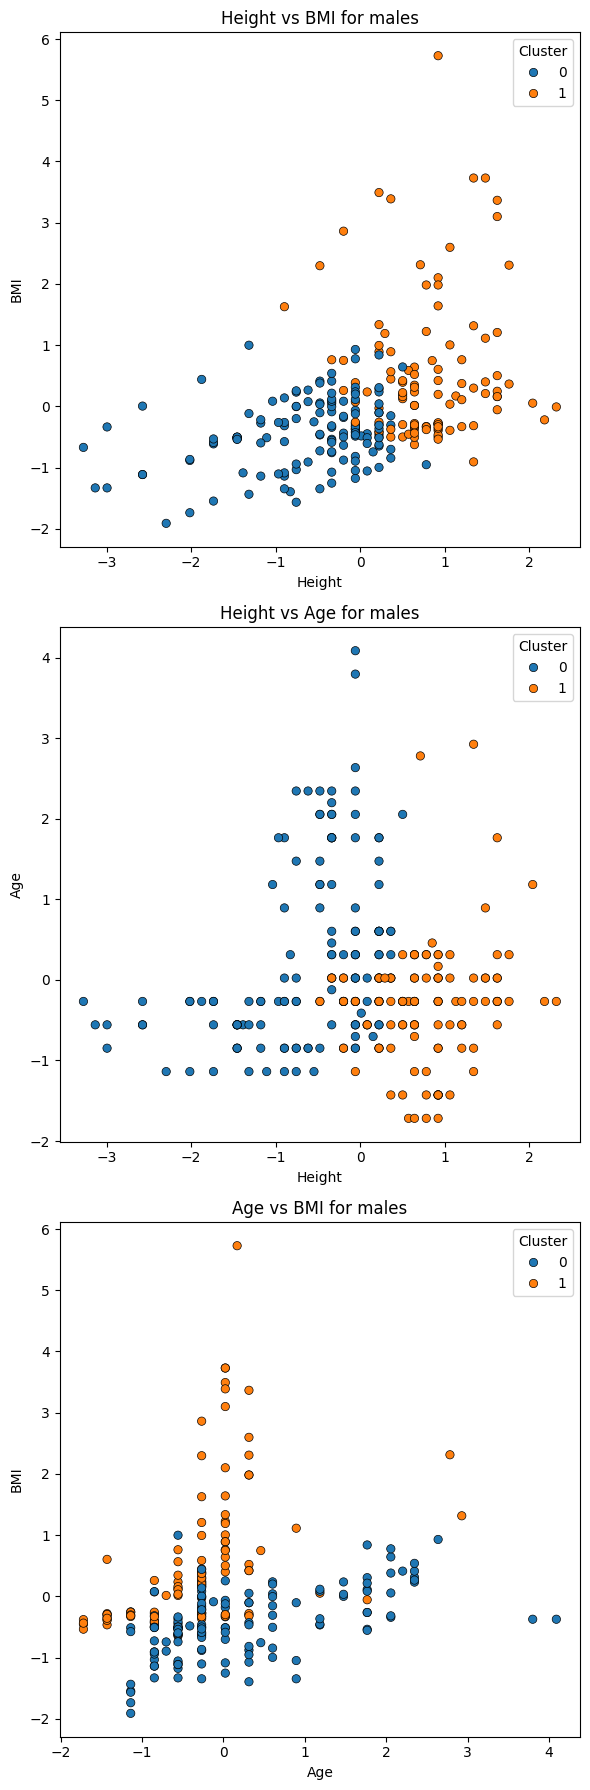

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(3, 1, figsize=(6, 18))

# Scatter plot 1: Height vs BMI
sns.scatterplot(data=bio_by_sport_male, x='Height', y='BMI', hue='Cluster', edgecolor='black', ax=axes[0])
axes[0].set_title('Height vs BMI for males')


# Scatter plot 2: Height vs Age
sns.scatterplot(data=bio_by_sport_male, x='Height', y='Age', hue='Cluster', edgecolor='black', ax=axes[1])
axes[1].set_title('Height vs Age for males')


# Scatter plot 3: Age vs BMI
sns.scatterplot(data=bio_by_sport_male, x='Age', y='BMI', hue='Cluster', edgecolor='black', ax=axes[2])
axes[2].set_title('Age vs BMI for males')


plt.tight_layout()
plt.show()


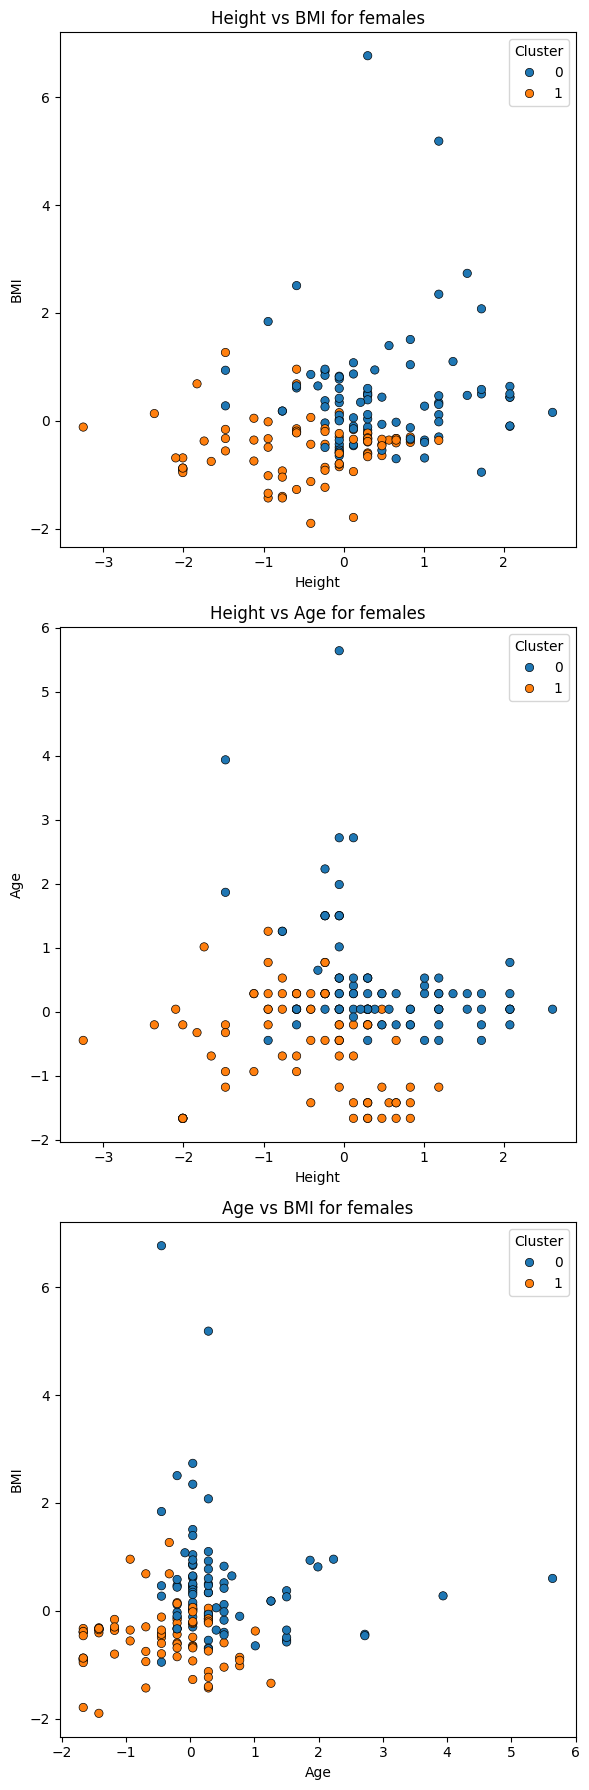

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(3, 1, figsize=(6, 18))

# Scatter plot 1: Height vs BMI
sns.scatterplot(data=bio_by_sport_female, x='Height', y='BMI', hue='Cluster', edgecolor='black', ax=axes[0])
axes[0].set_title('Height vs BMI for females')


# Scatter plot 2: Height vs Age
sns.scatterplot(data=bio_by_sport_female, x='Height', y='Age', hue='Cluster', edgecolor='black', ax=axes[1])
axes[1].set_title('Height vs Age for females')


# Scatter plot 3: Age vs BMI
sns.scatterplot(data=bio_by_sport_female, x='Age', y='BMI', hue='Cluster', edgecolor='black', ax=axes[2])
axes[2].set_title('Age vs BMI for females')

plt.tight_layout()
plt.show()


In [9]:
import numpy as np
import pandas as pd
from itertools import combinations


distance_list = []

for (i, row1), (j, row2) in combinations(bio_by_sport_male.iterrows(), 2):
    dist = np.linalg.norm(row1[used_columns].values - row2[used_columns].values)
    
    distance_list.append({
        'Event 1': row1['Event'],
        'Cluster 1': row1['Cluster'],
        'Event 2': row2['Event'],
        'Cluster 2': row2['Cluster'],
        'Distance': dist
    })

df_distances = pd.DataFrame(distance_list)

df_sorted = df_distances.sort_values(by='Distance').reset_index(drop=True)

print(df_sorted[["Event 1", "Cluster 1", "Event 2", "Cluster 2", "Distance"]])


                                              Event 1  Cluster 1  \
0                      Gymnastics Men's Parallel Bars          0   
1                Wrestling Men's Flyweight, Freestyle          0   
2                     Fencing Men's Sabre, Individual          0   
3                     Gymnastics Men's Floor Exercise          0   
4      Cycling Men's Individual Pursuit, 4,000 metres          1   
...                                               ...        ...   
30130                       Boxing Men's Bantamweight          0   
30131                          Boxing Men's Flyweight          0   
30132           Weightlifting Men's Super-Heavyweight          1   
30133           Weightlifting Men's Super-Heavyweight          1   
30134                    Boxing Men's Light-Flyweight          0   

                                            Event 2  Cluster 2  Distance  
0                  Gymnastics Men's Pommelled Horse          0  0.000000  
1            Wrestling Men's Flyw

In [51]:
import numpy as  np

target_row = bio_by_sport_male.loc[bio_by_sport_male['Event'] == 'Global average Male']

bio_by_sport_male['distance'] = bio_by_sport_male[used_columns].apply(
    lambda row: np.linalg.norm(row.values - target_row[used_columns].values), axis=1
)

df_sorted = bio_by_sport_male.sort_values(by='distance').reset_index(drop=True)

print(df_sorted[["Event", "Cluster", "distance"]])

                                            Event  Cluster  distance
0                             Global average Male        1  0.000000
1                           Golf Men's Individual        1  0.435196
2                      Shooting Men's Double Trap        1  0.435350
3             Sailing Mixed Three Person Keelboat        1  0.477542
4                          Sailing Mixed 6 metres        1  0.579403
..                                            ...      ...       ...
242                        Boxing Men's Flyweight        0  4.046828
243    Wrestling Men's Light-Flyweight, Freestyle        0  4.207717
244  Wrestling Men's Light-Flyweight, Greco-Roman        0  4.255653
245                  Boxing Men's Light-Flyweight        0  4.292562
246         Weightlifting Men's Super-Heavyweight        1  5.362839

[247 rows x 3 columns]


In [52]:
bio_by_sport_male.sort_values(by="Age")

,Event,Height,BMI,Age,Cluster,distance
198,Swimming Men's 400 metres Freestyle,0.781928,-0.379906,-1.718544,0,3.431121
199,Swimming Men's 400 metres Individual Medley,0.642034,-0.437751,-1.718544,0,3.419161
184,"Swimming Men's 1,500 metres Freestyle",0.572087,-0.454843,-1.718544,0,3.411977
190,Swimming Men's 200 metres Backstroke,0.921822,-0.536425,-1.718544,0,3.513578
27,"Athletics Men's Discus Throw, Both Hands",0.921822,0.604030,-1.428185,0,3.043989
...,...,...,...,...,...,...
175,Shooting Men's Trap,-0.057436,0.929197,2.636831,1,1.209108
20,Athletics Men's 56-pound Weight Throw,0.711981,2.312731,2.782010,1,2.264687
152,Sailing Men's Two Person Keelboat,1.341505,1.315848,2.927190,1,2.102494
103,"Equestrianism Mixed Dressage, Individual",-0.057436,-0.374145,3.798265,1,2.525513


In [53]:
bio_by_sport_female.sort_values(by="Age")

,Event,Height,BMI,Age,Cluster
124,Swimming Women's 100 metres Backstroke,0.656996,-0.328928,-1.665939,1
89,Rhythmic Gymnastics Women's Group,0.123873,-1.793137,-1.665939,1
72,Gymnastics Women's Balance Beam,-2.008620,-0.890250,-1.665939,1
73,Gymnastics Women's Floor Exercise,-2.008620,-0.877313,-1.665939,1
76,Gymnastics Women's Team All-Around,-2.008620,-0.960669,-1.665939,1
...,...,...,...,...,...
112,"Shooting Mixed Small-Bore Rifle, Prone, 50 metres",-0.231543,0.955850,2.232000,0
58,"Equestrianism Mixed Dressage, Individual",-0.053835,-0.436360,2.719243,0
59,"Equestrianism Mixed Dressage, Team",0.123873,-0.462122,2.719243,0
102,Sailing Mixed Three Person Keelboat,-1.475497,0.276626,3.937349,0
